# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


In [69]:
url = f'https://api.openweathermap.org/data/2.5/weather?q=London&appid={weather_api_key}'
response = requests.get(url).json()
response

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 8.02,
  'feels_like': 6.35,
  'temp_min': 6.12,
  'temp_max': 9.52,
  'pressure': 999,
  'humidity': 84},
 'visibility': 10000,
 'wind': {'speed': 2.68, 'deg': 251, 'gust': 4.02},
 'clouds': {'all': 100},
 'dt': 1669253131,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1669275200,
  'sunset': 1669305680},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [57]:
response['clouds']['all']

35

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [58]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + f'q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | arona
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | quatre cocos
Processing Record 7 of Set 1 | banda aceh
Processing Record 8 of Set 1 | samarai
Processing Record 9 of Set 1 | borzya
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 13 of Set 1 | saint-ambroise
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | qinggang
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | dingle
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | marcona
City not found. Skipping...
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 

In [27]:
type(city_data)

list

In [2]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'city_data' is not defined

In [60]:
# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,288.62,82,85,1.30,ZA,1669159624
1,barrow,71.2906,-156.7887,262.16,85,100,7.72,US,1669159624
2,new norfolk,-42.7826,147.0587,287.55,53,85,4.02,AU,1669159625
3,arona,28.0996,-16.6810,291.00,79,20,4.63,ES,1669159625
4,busselton,-33.6500,115.3333,292.90,63,19,2.57,AU,1669159626
5,quatre cocos,-20.2078,57.7625,296.53,86,8,2.55,MU,1669159627
6,banda aceh,5.5577,95.3222,298.41,84,91,3.94,ID,1669159627
7,samarai,-10.6167,150.6667,302.64,68,15,7.59,PG,1669159628
8,borzya,50.3833,116.5167,250.93,96,14,1.26,RU,1669159628
9,bluff,-46.6000,168.3333,289.15,64,16,4.61,NZ,1669159629


In [61]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#converting to C
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

# Display sample data
city_data_df.head(40)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,288.62,82,85,1.30,ZA,1669159624
1,barrow,71.2906,-156.7887,262.16,85,100,7.72,US,1669159624
2,new norfolk,-42.7826,147.0587,287.55,53,85,4.02,AU,1669159625
3,arona,28.0996,-16.6810,291.00,79,20,4.63,ES,1669159625
4,busselton,-33.6500,115.3333,292.90,63,19,2.57,AU,1669159626
5,quatre cocos,-20.2078,57.7625,296.53,86,8,2.55,MU,1669159627
6,banda aceh,5.5577,95.3222,298.41,84,91,3.94,ID,1669159627
7,samarai,-10.6167,150.6667,302.64,68,15,7.59,PG,1669159628
8,borzya,50.3833,116.5167,250.93,96,14,1.26,RU,1669159628


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

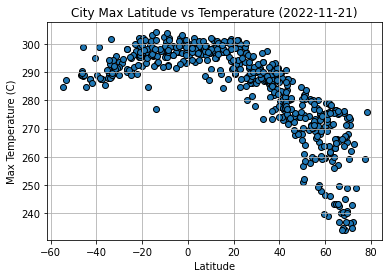

In [56]:
# Build scatter plot for latitude vs. temperature
city_lat = city_data_df['Lat']
city_max_temp = city_data_df['Max Temp']
plt.scatter(city_lat, city_max_temp, edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature (2022-11-21)')
plt.grid()

plt.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

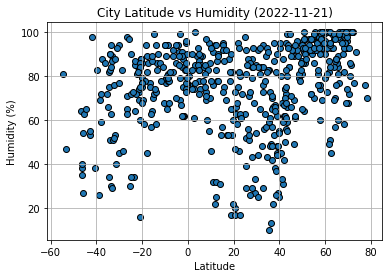

In [57]:
# Build the scatter plots for latitude vs. humidity
city_humidity = city_data_df['Humidity']

plt.scatter(city_lat, city_humidity, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2022-11-21)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

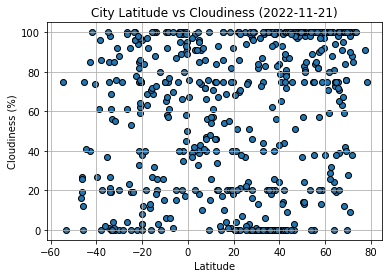

In [58]:
# Build the scatter plots for latitude vs. cloudiness
city_cloudiness = city_data_df['Cloudiness']
plt.scatter(city_lat,city_cloudiness, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (2022-11-21)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

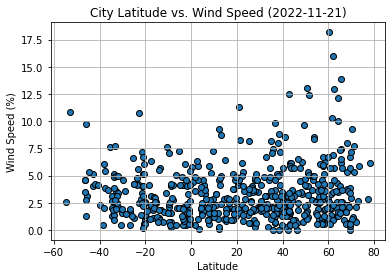

In [59]:
# Build the scatter plots for latitude vs. wind speed
city_wind_speed = city_data_df['Wind Speed']
plt.scatter(city_lat, city_wind_speed, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title('City Latitude vs. Wind Speed (2022-11-21)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def bestfit(x_axis,y_axis):
    slope, b, r, p, std = linregress(x_axis, y_axis)
    fit = slope * x_axis + b
    plt.plot(x_axis,fit,color = 'red')
    line_eq = f'y = {slope.round(2)}x + {b.round(2)}'
    print(f'The r value is: {r}.')

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_cities_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,barrow,71.2906,-156.7887,262.16,85,100,7.72,US,1669159624
3,arona,28.0996,-16.6810,291.00,79,20,4.63,ES,1669159625
6,banda aceh,5.5577,95.3222,298.41,84,91,3.94,ID,1669159627
8,borzya,50.3833,116.5167,250.93,96,14,1.26,RU,1669159628
10,broome,42.2506,-75.8330,277.36,67,0,3.09,US,1669159630


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_cities_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,288.62,82,85,1.30,ZA,1669159624
2,new norfolk,-42.7826,147.0587,287.55,53,85,4.02,AU,1669159625
4,busselton,-33.6500,115.3333,292.90,63,19,2.57,AU,1669159626
5,quatre cocos,-20.2078,57.7625,296.53,86,8,2.55,MU,1669159627
7,samarai,-10.6167,150.6667,302.64,68,15,7.59,PG,1669159628


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8431497123655384.


Text(0.5, 1.0, 'Latitude vs. Max Temperature (C) in Northern Hemisphere Cities')

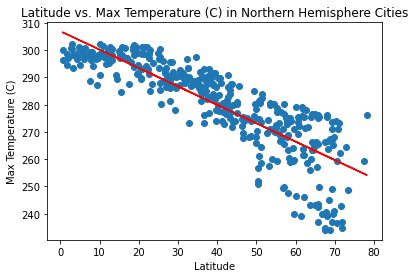

In [62]:
# Linear regression on Northern Hemisphere
north_hemi_lat = northern_hemi_cities_df['Lat']
north_hemi_max_temp = northern_hemi_cities_df['Max Temp']

plt.scatter(north_hemi_lat, north_hemi_max_temp,)
bestfit(north_hemi_lat, north_hemi_max_temp)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude vs. Max Temperature (C) in Northern Hemisphere Cities')

The r value is: 0.6445130657758221.


Text(0.5, 1.0, 'Latitude vs. Max Temperature (C) in Southern Hemisphere Cities')

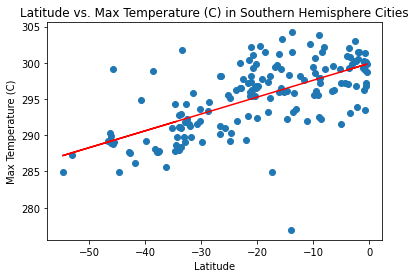

In [63]:
# Linear regression on Southern Hemisphere
south_hemi_lat = southern_hemi_cities_df['Lat']
south_hemi_max_temp = southern_hemi_cities_df['Max Temp']

plt.scatter(south_hemi_lat, south_hemi_max_temp)
bestfit(south_hemi_lat, south_hemi_max_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude vs. Max Temperature (C) in Southern Hemisphere Cities')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.30236223307057475.


Text(0.5, 1.0, 'Humidity vs. Latitude in Northern Hemisphere Cities')

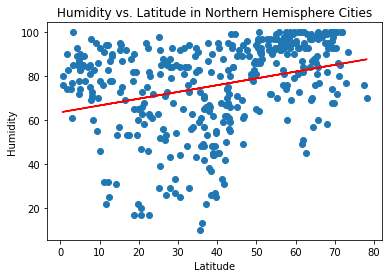

In [64]:
# Northern Hemisphere
north_hemi_humidity = northern_hemi_cities_df['Humidity']

plt.scatter(north_hemi_lat, north_hemi_humidity)
bestfit(north_hemi_lat, north_hemi_humidity)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude in Northern Hemisphere Cities')

The r value is: 0.4205106088127492.


Text(0.5, 1.0, 'Humidity vs. Latitude in Southern Hemisphere Cities')

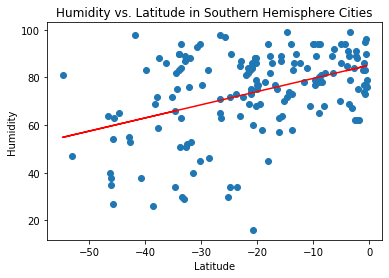

In [65]:
# Southern Hemisphere
south_hemi_humidity = southern_hemi_cities_df['Humidity']

plt.scatter(south_hemi_lat, south_hemi_humidity)
bestfit(south_hemi_lat, south_hemi_humidity)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude in Southern Hemisphere Cities')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.26790473662983594.


Text(0, 0.5, 'Cloudiness')

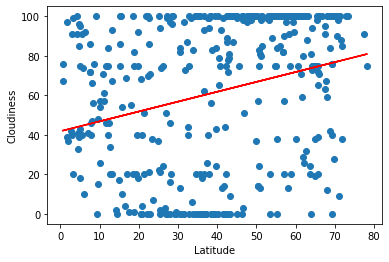

In [66]:
# Northern Hemisphere
north_hemi_cloudiness = northern_hemi_cities_df['Cloudiness']

plt.scatter(north_hemi_lat, north_hemi_cloudiness)
bestfit(north_hemi_lat, north_hemi_cloudiness)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The r value is: 0.28180571020877443.


Text(0, 0.5, 'Cloudiness')

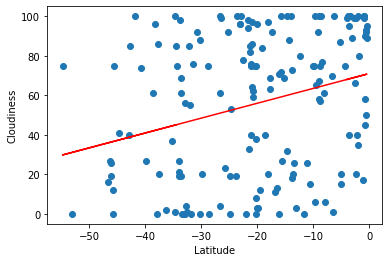

In [55]:
# Southern Hemisphere
south_hemi_cloudiness = southern_hemi_cities_df['Cloudiness']

plt.scatter(south_hemi_lat, south_hemi_cloudiness)
bestfit(south_hemi_lat, south_hemi_cloudiness)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.12513427725694573.


Text(0, 0.5, 'Wind Speed')

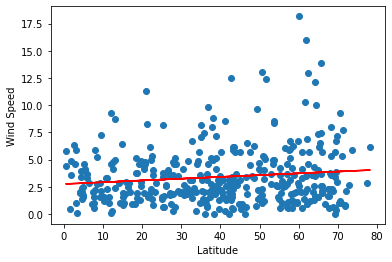

In [67]:
# Northern Hemisphere
north_hemi_wind_speed = northern_hemi_cities_df['Wind Speed']

plt.scatter(north_hemi_lat, north_hemi_wind_speed)
bestfit(north_hemi_lat, north_hemi_wind_speed)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

The r value is: -0.26999227585091307.


Text(0, 0.5, 'Wind Speed')

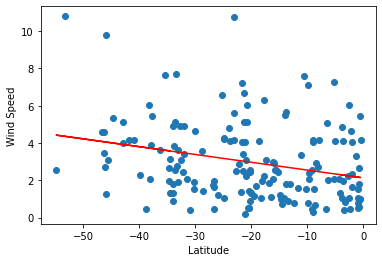

In [68]:
# Southern Hemisphere
south_hemi_wind_speed = southern_hemi_cities_df['Wind Speed']

plt.scatter(south_hemi_lat, south_hemi_wind_speed)
bestfit(south_hemi_lat, south_hemi_wind_speed)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE